In [3]:
"""
    Refer to: https://blog.csdn.net/qq_53201790/article/details/129216255
"""
# import quandl
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt



c:\Users\Xunjing\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# Get the stock data
df = pd.read_csv('GOOG-year.csv')
df = df[['Date','Open','High','Low','Adj Close','Volume']]
df['HL_PCT'] = (df['High'] - df['Adj Close']) / df['Adj Close'] * 100.0
df['PCT_change'] = (df['Adj Close'] - df['Open']) / df['Open'] * 100.0
# 真正用的特征
df = df[['Adj Close', 'HL_PCT', 'PCT_change', 'Volume']]
df_svr = df[['Adj Close']]
#预测后30天的股价
forecast_out = 30
# create another column, (the target or dependent variable), shifted n units up
df['Prediction'] = df[['Adj Close']].shift(-forecast_out)
df_svr['Prediction'] = df_svr[['Adj Close']].shift(-forecast_out)


C:\Users\Xunjing\AppData\Local\Temp/ipykernel_7672/3295665209.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_svr['Prediction'] = df_svr[['Adj Close']].shift(-forecast_out)


In [5]:
# Create the independent data set (X)
# Convert the dataframe to a numpy array
X = np.array(df.drop(['Prediction'],1))
X_svr = np.array(df_svr.drop(['Prediction'],1))
# Remove the last n rows
X = X[:-forecast_out]
X_svr = X_svr[:-forecast_out]

y = np.array(df['Prediction'])
y_svr = np.array(df_svr['Prediction'])
y = y[:-forecast_out]
y_svr = y_svr[:-forecast_out]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.133)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_svr, y_svr, test_size=0.133)
# Set x_forecast equal to the last 30 rows of the original data set from Adj Close column
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
x_forecast_svr = np.array(df_svr.drop(['Prediction'],1))[-forecast_out:]

C:\Users\Xunjing\AppData\Local\Temp/ipykernel_7672/2336860289.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Prediction'],1))
C:\Users\Xunjing\AppData\Local\Temp/ipykernel_7672/2336860289.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_svr = np.array(df_svr.drop(['Prediction'],1))
C:\Users\Xunjing\AppData\Local\Temp/ipykernel_7672/2336860289.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
C:\Users\Xunjing\AppData\Local\Temp/ipykernel_7672/2336860289.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_forecast_svr = np.array(df_svr.drop

In [6]:
def ridge_reg():
    # Create and train the Linear Regression Model
    ridge = Ridge(alpha = 10)
    ridge.fit(X_train, y_train)
    ridge_forecast_set = ridge.predict(X_test)
    # print(r2_score(y_train,lr.predict(X_train)))
    return ridge_forecast_set

In [7]:
def lasso_reg():
    # Create and train the Linear Regression Model
    lasso = Lasso(alpha =10)
    lasso.fit(X_train, y_train)
    lasso_forecast_set = lasso.predict(X_test)
    # print(r2_score(y_train,lr.predict(X_train)))
    return lasso_forecast_set

In [8]:
def svr_reg():
    # Create and train the SVR
    svr_rbf = SVR(kernel='rbf', C=1e2, gamma=0.01)
    svr_rbf.fit(X_train_s, y_train_s)
    svr_forecast_set = svr_rbf.predict(X_test_s)
    return svr_forecast_set

In [9]:
def calculate_accuracy(real, predict):
    real = np.array(real) + 1
    predict = np.array(predict) + 1
    percentage = 1 - np.sqrt(np.mean(np.square((real - predict) / real)))
    return percentage * 100

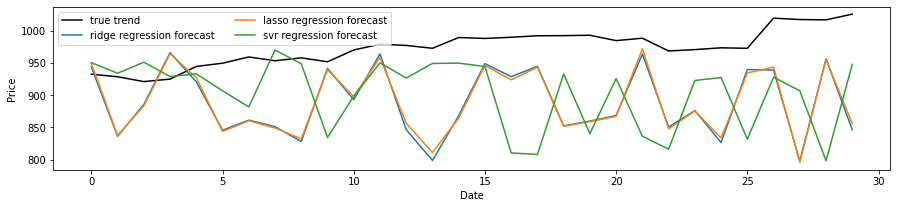

ridge regression acc is: 89.4822
lasso regression acc is: 89.6312
svr regression acc is: 90.3083


In [13]:
# Original stock price
z = np.array(df['Adj Close'])
z = z[-forecast_out:]

# plot
ridge_forecast = ridge_reg()
lasso_forecast = lasso_reg()
svr_forecast = svr_reg()
plt.figure(figsize=(15,3))
plt.plot(z,label='true trend',c='black')
plt.plot(ridge_forecast,label='ridge regression forecast')
plt.plot(lasso_forecast,label='lasso regression forecast')
plt.plot(svr_forecast,label='svr regression forecast')
# plt.plot(lr_prediction,label='prediction')
# df['Adj Close'].plot()
plt.legend(loc=2,ncol=2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
print('ridge regression acc is: %.4f'%calculate_accuracy(z,ridge_forecast))
print('lasso regression acc is: %.4f'%calculate_accuracy(z,lasso_forecast))
print('svr regression acc is: %.4f'%calculate_accuracy(z,svr_forecast))